In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from  sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import  make_pipeline,Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression
from sklearn.metrics import confusion_matrix,classification_report

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
 parms={
                        "classifier__weights":["uniform", "distance"],
                        "classifier__algorithm":["auto", "ball_tre", "kd_tree", "brute"],
                        'classifier__n_neighbors':[2,3,4,5,6,7],}

In [2]:
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv(r"C:\Users\hp\Desktop\file1.csv")

In [4]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
def data_preprocessor(X,y):
        """Function to Prepocess the data """
        numeric_transformer = Pipeline(
                steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
            )

        categorical_transformer = OneHotEncoder(handle_unknown="ignore")
        preprocessor = ColumnTransformer(
                transformers=[
                    ("numeric", numeric_transformer, X.select_dtypes(np.number).columns.tolist()),
                    ("category", categorical_transformer,X.select_dtypes("object").columns.tolist()),
                ]
            )
        return preprocessor

In [5]:
def result_evaluator_classfication(model,xtest,ytest,temp):
         rem=1
         ypred=model.predict(xtest)
         cmaxt=confusion_matrix(ytest,ypred,labels=[0,1])
         sns_heat=sns.heatmap(cmaxt,cmap="Greens",annot=True,cbar_kws={"orientation": "vertical","label":"color bar"},xticklabels=[0,1],yticklabels=[0,1])
         plt.xlabel("Predicated")
         plt.ylabel("Actual")
         plt.title("Confusion Matrix")
         plt.show()
         result_path="praj"+str(temp)
         report=classification_report(ytest,ypred)
         sns_heat.figure.savefig(result_path, dpi=400)
        #  df = pd.DataFrame(report).transpose()
        #  df.drop('support', axis=1, inplace=True)
        #  sns.heatmap(df, annot=True, cmap='Blues')
        #  plt.show()
         rem=rem+1
         return report,cmaxt 

<AxesSubplot:ylabel='Class'>

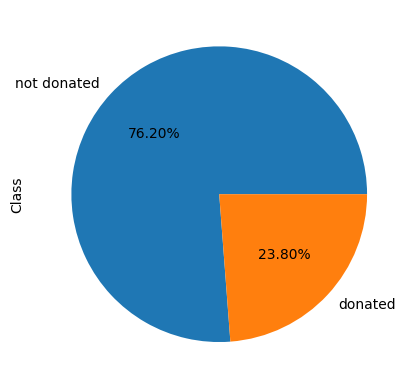

In [6]:
df["Class"].value_counts().plot(kind="pie",autopct='%.2f%%')

In [7]:
def result_evaluator_self_classfication(model,xtest,yest):
                ypred=model.predict(xtest)
                print(f"THe accuracy is :",accuracy_score(yest,ypred))
                

In [8]:
def random_forest_classifier(X,y,start,end,parms):
        temp=1
        Listing=[]
        preprocessor=data_preprocessor(X,y)
        xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=45)
  
        for i in range(start,end):
        # ****************Feature Seclortot**********************************************
                feature_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i))])
                feature_selector.fit(xtrain,ytrain)
        # ****************Model Selector**********************************************
                model_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i)),
                    ("classifier", RandomForestClassifier())]
                )
                model_selector.fit(xtrain,ytrain)
        # *********************************Hyper Parametet***********************************
                grid=GridSearchCV(model_selector,parms,cv=4,n_jobs=-1,verbose=3)
                grid.fit(xtrain,ytrain)
                feature=grid.best_params_
                model=grid.best_estimator_
                # ypred_model=model_selector.predict(xtest)
                
        #****************************Result Generation ******************************
                clas_report_parameter,conf_mat_parameter=result_evaluator_classfication(model,xtest,ytest,temp)
                temp=temp+1
                print("Confusion Matrix is With Best Perimator:" , conf_mat_parameter)
                # st.write(confusion_matrix(ypred,ytest))
                print("CLassification Report is With Best Perimator :",clas_report_parameter)
                clas_report,conf_mat_=result_evaluator_classfication(model_selector,xtest,ytest,temp)
                temp=temp+1
                print("Confusion Matrix is Without Best Perimator:" , conf_mat_parameter)
                # st.write(confusion_matrix(ypred,ytest))
                print("CLassification Report is  Without Best Perimator:",clas_report_parameter)
                # st.write(classification_report(ypred,ytest))
                
        #*********************************Working on features****************************
                xopt=feature_selector.get_feature_names_out()
                feature_selection=[]
                for x in xopt:
                    feature_selection.append(x.split("__")[1])
                print("The feature Selection are as follow-:")
                print(feature_selection)
                print("The Hyper Parameter are as follow -:")
                print(feature)
                print(feature_selection)
                # st.write("************************")
                # st.write(f"Iteration Number is{i} ")
                # print(f"***********************--{i}******************")
                # print("**********new********************")

        # ********************Colecting Data--***********************************************
                Listing.append({
                    "i":i,
                    "Con_mat_para":conf_mat_parameter,
                    "clas_report_para":clas_report_parameter,
                    # "Error":result,
                    # "Error_model":result_model,
                    "columns":feature_selection,
                    "parameter":feature
                })
                print(";isting")
                print(";isting")
                print(";isting")
                print(Listing)
                # temp=temp+1
               
        return Listing

Fitting 4 folds for each of 1 candidates, totalling 4 fits


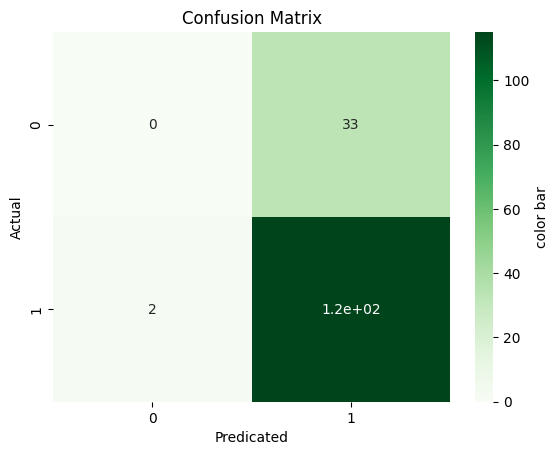

Confusion Matrix is With Best Perimator: [[  0  33]
 [  2 115]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.78      0.98      0.87       117

    accuracy                           0.77       150
   macro avg       0.39      0.49      0.43       150
weighted avg       0.61      0.77      0.68       150



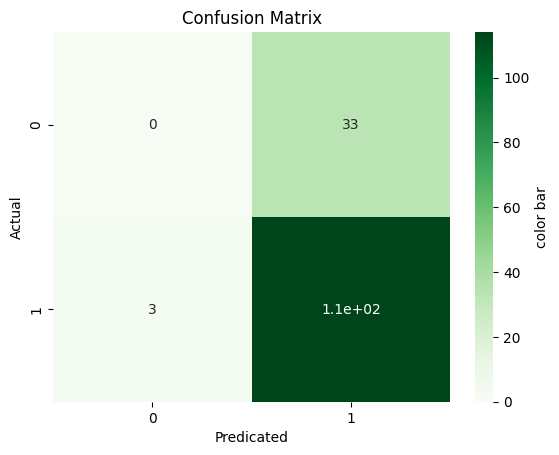

Confusion Matrix is Without Best Perimator: [[  0  33]
 [  2 115]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.78      0.98      0.87       117

    accuracy                           0.77       150
   macro avg       0.39      0.49      0.43       150
weighted avg       0.61      0.77      0.68       150

The feature Selection are as follow-:
['Recency']
The Hyper Parameter are as follow -:
{}
['Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[  0,  33],
       [  2, 115]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        33\n           1       0.78      0.98      0.87       117\n\n    accuracy                           0.77       150\n   macro avg       0.39      0.49      0.43       150\nweighted avg       0.61      0.77      0.68       1

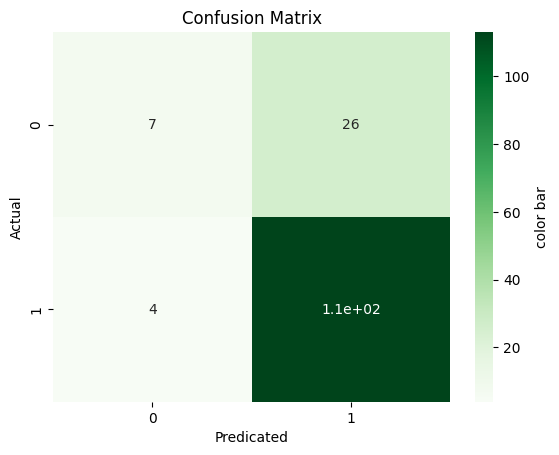

Confusion Matrix is With Best Perimator: [[  7  26]
 [  4 113]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.64      0.21      0.32        33
           1       0.81      0.97      0.88       117

    accuracy                           0.80       150
   macro avg       0.72      0.59      0.60       150
weighted avg       0.77      0.80      0.76       150



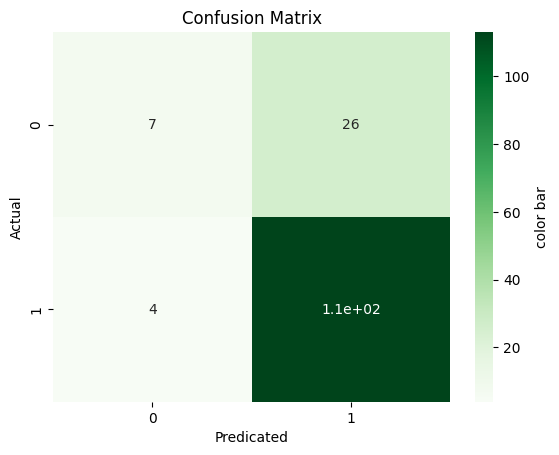

Confusion Matrix is Without Best Perimator: [[  7  26]
 [  4 113]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.64      0.21      0.32        33
           1       0.81      0.97      0.88       117

    accuracy                           0.80       150
   macro avg       0.72      0.59      0.60       150
weighted avg       0.77      0.80      0.76       150

The feature Selection are as follow-:
['Recency', 'Monetary']
The Hyper Parameter are as follow -:
{}
['Recency', 'Monetary']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[  0,  33],
       [  2, 115]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        33\n           1       0.78      0.98      0.87       117\n\n    accuracy                           0.77       150\n   macro avg       0.39      0.49      0.43       150\nweighted avg       0.61    

In [9]:
X=df.drop(columns=["Class"])
parms={}
le=LabelEncoder()
y=le.fit_transform(df["Class"]) 
Listing=random_forest_classifier(X,y,1,3,parms)

In [10]:
def random_forest_classifie(X,y,start,end,parms):
        Listing=[]
        preprocessor=data_preprocessor(X,y)
        xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=45)
  
        for i in range(start,end):
        # ****************Feature Seclortot**********************************************
                feature_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i))])
                feature_selector.fit(xtrain,ytrain)
        # ****************Model Selector**********************************************
                model_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i)),
                    ("classifier", RandomForestClassifier())]
                )
                model_selector.fit(xtrain,ytrain)
        # *********************************Hyper Parametet***********************************
                grid=GridSearchCV(model_selector,parms,cv=4,n_jobs=-1,verbose=3)
                grid.fit(xtrain,ytrain)
                feature=grid.best_params_
                model=grid.best_estimator_
                # ypred_model=model_selector.predict(xtest)
                
        #****************************Result Generation ******************************
                result_evaluator_self_classfication(model,xtest,ytest)
                
                # print("Confusion Matrix is With Best Perimator:" , conf_mat_parameter)
                # # st.write(confusion_matrix(ypred,ytest))
                # print("CLassification Report is With Best Perimator :",clas_report_parameter)
                # clas_report,conf_mat_=result_evaluator_classfication(model_selector,xtest,ytest)
                # print("Confusion Matrix is Without Best Perimator:" , conf_mat_parameter)
                # # st.write(confusion_matrix(ypred,ytest))
                # print("CLassification Report is  Without Best Perimator:",clas_report_parameter)
                # st.write(classification_report(ypred,ytest))
                
        #*********************************Working on features****************************
                xopt=feature_selector.get_feature_names_out()
                feature_selection=[]
                for x in xopt:
                    feature_selection.append(x.split("__")[1])
                print("The feature Selection are as follow-:")
                print(feature_selection)
                print("The Hyper Parameter are as follow -:")
                print(feature)
                print(feature_selection)
                # st.write("************************")
                # st.write(f"Iteration Number is{i} ")
                # print(f"***********************--{i}******************")
                # print("**********new********************")

        # ********************Colecting Data--***********************************************
                Listing.append({
                #     "i":i,
                #     "Con_mat_para":conf_mat_parameter,
                #     "clas_report_para":clas_report_parameter,
                #     # "Error":result,
                    # "Error_model":result_model,
                    "columns":feature_selection,
                    "parameter":feature
                })
              
                # print(Listing)
        return Listing

In [11]:
X=df.drop(columns=["Class"])
parms={}
le=LabelEncoder()
y=le.fit_transform(df["Class"]) 
Listing=random_forest_classifie(X,y,1,3,parms)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
THe accuracy is : 0.7666666666666667
The feature Selection are as follow-:
['Recency']
The Hyper Parameter are as follow -:
{}
['Recency']
Fitting 4 folds for each of 1 candidates, totalling 4 fits
THe accuracy is : 0.8
The feature Selection are as follow-:
['Recency', 'Monetary']
The Hyper Parameter are as follow -:
{}
['Recency', 'Monetary']


In [12]:
 from sklearn.metrics import balanced_accuracy_score


In [13]:
def result_evaluator_self_classfication(model,xtest,yest):
                ypred=model.predict(xtest)
                print(f"THe accuracy is :",accuracy_score(yest,ypred))
                print(f"THe  baclanced accuracy is :",balanced_accuracy_score(yest,ypred))
                

In [14]:
print("hello")

hello


In [15]:
base_url="D:/machine learning/Project/Website/Train_your_model/media/"

In [16]:
print(base_url+"hello")

D:/machine learning/Project/Website/Train_your_model/media/hello


In [19]:
from imblearn.over_sampling import RandomOverSampler
X=df.drop(columns=["Class"])
parms={}
le=LabelEncoder()
y=le.fit_transform(df["Class"]) 
from imblearn.pipeline import Pipeline 
preprocessor=data_preprocessor(X,y)

In [20]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', RandomOverSampler())
])
X_resampled, y_resampled = pipeline.fit_resample(X, y)
print(X.shape)
print(X_resampled.shape)
X_resampled=pd.DataFrame(X_resampled,columns=X.columns)

(748, 5)
(1140, 5)


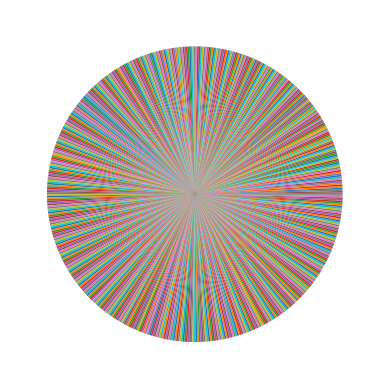

In [ ]:
X.head()

,Unnamed: 0,Recency,Frequency,Monetary,Time
0,0,2,50,12500,98
1,1,0,13,3250,28
2,2,1,16,4000,35
3,3,2,20,5000,45
4,4,1,24,6000,77


In [ ]:
X_resampled.head()

,Unnamed: 0,Recency,Frequency,Monetary,Time
0,-1.729737,-0.927899,7.623346,7.623346,2.615633
1,-1.725106,-1.175118,1.282738,1.282738,-0.257881
2,-1.720474,-1.051508,1.796842,1.796842,0.029471
3,-1.715843,-0.927899,2.482313,2.482313,0.439973
4,-1.711212,-1.051508,3.167784,3.167784,1.753579


In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
def random_forest_classifier(X,y,start,end,parms):
        temp=1
        Listing=[]
        preprocessor=data_preprocessor(X,y)
        pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                 ('oversampler', SMOTE())
                                ])
        X_resampled, y_resampled = pipeline.fit_resample(X, y)
        X_resampled=pd.DataFrame(X_resampled,columns=X.columns)
# print(X.shape)
# print(X_resampled.shape)
        xtrain,xtest,ytrain,ytest=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=45)
  
        for i in range(start,end):
                
        # ****************Feature Seclortot**********************************************
                feature_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i))])
                feature_selector.fit(xtrain,ytrain)
        # ****************Model Selector**********************************************
                model_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i)),
                    ("classifier", RandomForestClassifier())]
                )
                model_selector.fit(xtrain,ytrain)
        # *********************************Hyper Parametet***********************************
                grid=GridSearchCV(model_selector,parms,cv=4,n_jobs=-1,verbose=3)
                grid.fit(xtrain,ytrain)
                feature=grid.best_params_
                model=grid.best_estimator_
                # ypred_model=model_selector.predict(xtest)
                
        #****************************Result Generation ******************************
                clas_report_parameter,conf_mat_parameter=result_evaluator_classfication(model,xtest,ytest,temp)
                temp=temp+1
                print("Confusion Matrix is With Best Perimator:" , conf_mat_parameter)
                # st.write(confusion_matrix(ypred,ytest))
                print("CLassification Report is With Best Perimator :",clas_report_parameter)
                clas_report,conf_mat_=result_evaluator_classfication(model_selector,xtest,ytest,temp)
                temp=temp+1
                print("Confusion Matrix is Without Best Perimator:" , conf_mat_parameter)
                # st.write(confusion_matrix(ypred,ytest))
                print("CLassification Report is  Without Best Perimator:",clas_report_parameter)
                # st.write(classification_report(ypred,ytest))
                
        #*********************************Working on features****************************
                xopt=feature_selector.get_feature_names_out()
                feature_selection=[]
                for x in xopt:
                    feature_selection.append(x.split("__")[1])
                print("The feature Selection are as follow-:")
                print(feature_selection)
                print("The Hyper Parameter are as follow -:")
                print(feature)
                print(feature_selection)
                # st.write("************************")
                # st.write(f"Iteration Number is{i} ")
                # print(f"***********************--{i}******************")
                # print("**********new********************")

        # ********************Colecting Data--***********************************************
                Listing.append({
                    "i":i,
                    "Con_mat_para":conf_mat_parameter,
                    "clas_report_para":clas_report_parameter,
                    # "Error":result,
                    # "Error_model":result_model,
                    "columns":feature_selection,
                    "parameter":feature
                })
                print(";isting")
                print(";isting")
                print(";isting")
                print(Listing)
                # temp=temp+1
               
        return Listing

Fitting 4 folds for each of 1 candidates, totalling 4 fits


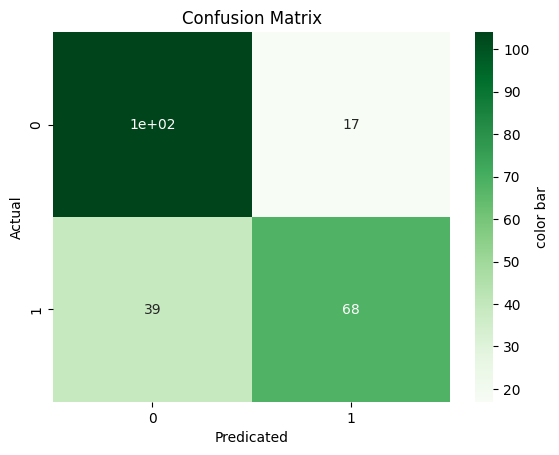

Confusion Matrix is With Best Perimator: [[104  17]
 [ 39  68]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.73      0.86      0.79       121
           1       0.80      0.64      0.71       107

    accuracy                           0.75       228
   macro avg       0.76      0.75      0.75       228
weighted avg       0.76      0.75      0.75       228



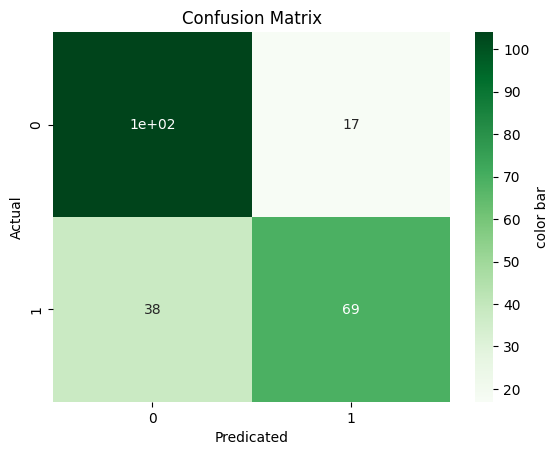

Confusion Matrix is Without Best Perimator: [[104  17]
 [ 39  68]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.73      0.86      0.79       121
           1       0.80      0.64      0.71       107

    accuracy                           0.75       228
   macro avg       0.76      0.75      0.75       228
weighted avg       0.76      0.75      0.75       228

The feature Selection are as follow-:
['Recency']
The Hyper Parameter are as follow -:
{}
['Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[104,  17],
       [ 39,  68]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.73      0.86      0.79       121\n           1       0.80      0.64      0.71       107\n\n    accuracy                           0.75       228\n   macro avg       0.76      0.75      0.75       228\nweighted avg       0.76      0.75      0.75       2

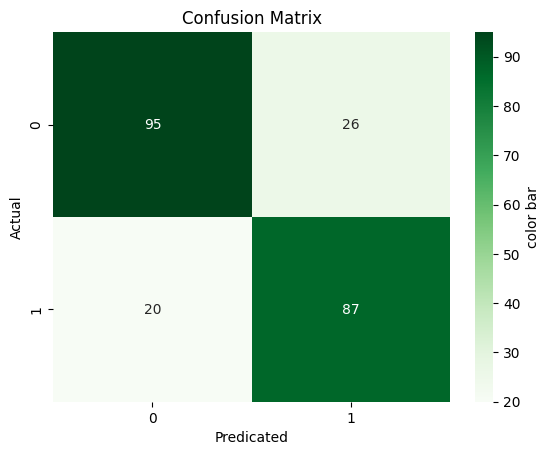

Confusion Matrix is With Best Perimator: [[95 26]
 [20 87]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.83      0.79      0.81       121
           1       0.77      0.81      0.79       107

    accuracy                           0.80       228
   macro avg       0.80      0.80      0.80       228
weighted avg       0.80      0.80      0.80       228



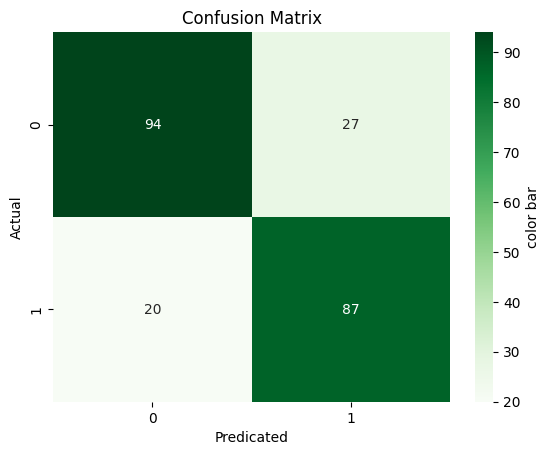

Confusion Matrix is Without Best Perimator: [[95 26]
 [20 87]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.83      0.79      0.81       121
           1       0.77      0.81      0.79       107

    accuracy                           0.80       228
   macro avg       0.80      0.80      0.80       228
weighted avg       0.80      0.80      0.80       228

The feature Selection are as follow-:
['Unnamed: 0', 'Recency']
The Hyper Parameter are as follow -:
{}
['Unnamed: 0', 'Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[104,  17],
       [ 39,  68]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.73      0.86      0.79       121\n           1       0.80      0.64      0.71       107\n\n    accuracy                           0.75       228\n   macro avg       0.76      0.75      0.75       228\nweighted avg       0.76    

In [ ]:
Listing=random_forest_classifier(X,y,1,3,parms)


Fitting 4 folds for each of 1 candidates, totalling 4 fits


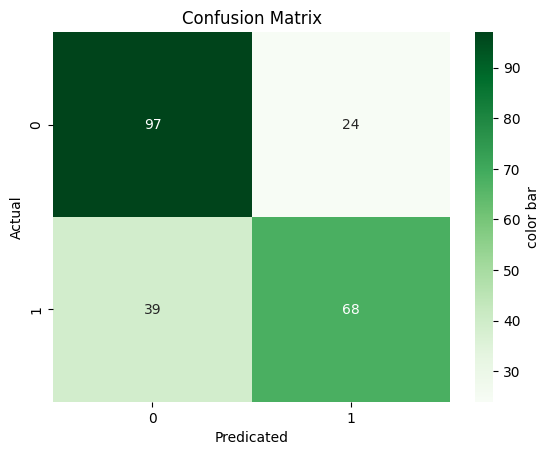

Confusion Matrix is With Best Perimator: [[97 24]
 [39 68]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.71      0.80      0.75       121
           1       0.74      0.64      0.68       107

    accuracy                           0.72       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.73      0.72      0.72       228



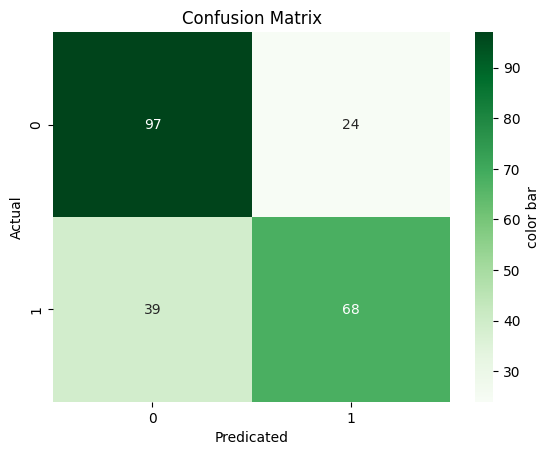

Confusion Matrix is Without Best Perimator: [[97 24]
 [39 68]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.71      0.80      0.75       121
           1       0.74      0.64      0.68       107

    accuracy                           0.72       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.73      0.72      0.72       228

The feature Selection are as follow-:
['Recency']
The Hyper Parameter are as follow -:
{}
['Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[97, 24],
       [39, 68]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.71      0.80      0.75       121\n           1       0.74      0.64      0.68       107\n\n    accuracy                           0.72       228\n   macro avg       0.73      0.72      0.72       228\nweighted avg       0.73      0.72      0.72       228\n', '

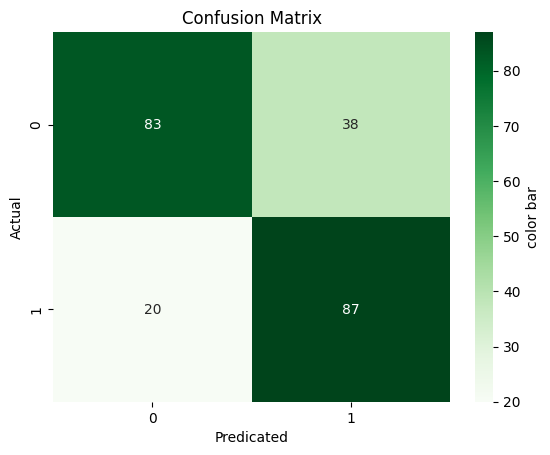

Confusion Matrix is With Best Perimator: [[83 38]
 [20 87]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.81      0.69      0.74       121
           1       0.70      0.81      0.75       107

    accuracy                           0.75       228
   macro avg       0.75      0.75      0.75       228
weighted avg       0.75      0.75      0.75       228



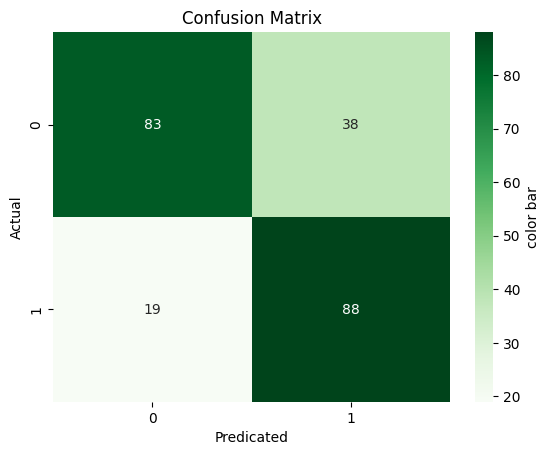

Confusion Matrix is Without Best Perimator: [[83 38]
 [20 87]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.81      0.69      0.74       121
           1       0.70      0.81      0.75       107

    accuracy                           0.75       228
   macro avg       0.75      0.75      0.75       228
weighted avg       0.75      0.75      0.75       228

The feature Selection are as follow-:
['Unnamed: 0', 'Recency']
The Hyper Parameter are as follow -:
{}
['Unnamed: 0', 'Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[97, 24],
       [39, 68]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.71      0.80      0.75       121\n           1       0.74      0.64      0.68       107\n\n    accuracy                           0.72       228\n   macro avg       0.73      0.72      0.72       228\nweighted avg       0.73      0.

In [ ]:
Listing=random_forest_classifier(X,y,1,3,parms)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


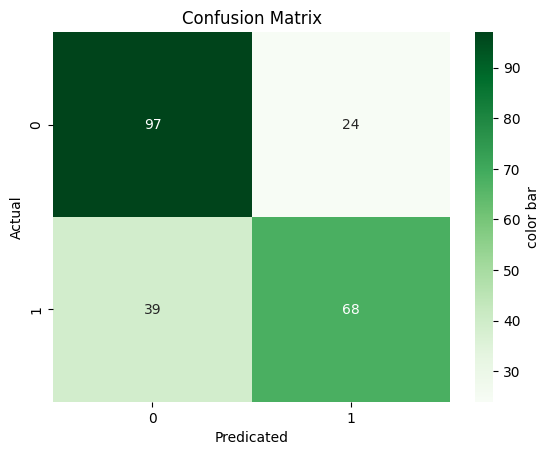

Confusion Matrix is With Best Perimator: [[97 24]
 [39 68]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.71      0.80      0.75       121
           1       0.74      0.64      0.68       107

    accuracy                           0.72       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.73      0.72      0.72       228



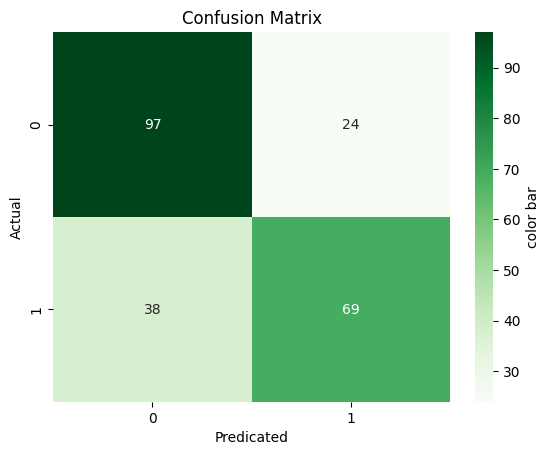

Confusion Matrix is Without Best Perimator: [[97 24]
 [39 68]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.71      0.80      0.75       121
           1       0.74      0.64      0.68       107

    accuracy                           0.72       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.73      0.72      0.72       228

The feature Selection are as follow-:
['Recency']
The Hyper Parameter are as follow -:
{}
['Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[97, 24],
       [39, 68]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.71      0.80      0.75       121\n           1       0.74      0.64      0.68       107\n\n    accuracy                           0.72       228\n   macro avg       0.73      0.72      0.72       228\nweighted avg       0.73      0.72      0.72       228\n', '

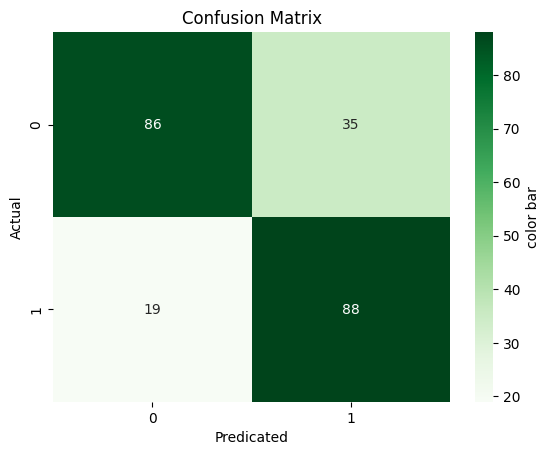

Confusion Matrix is With Best Perimator: [[86 35]
 [19 88]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.82      0.71      0.76       121
           1       0.72      0.82      0.77       107

    accuracy                           0.76       228
   macro avg       0.77      0.77      0.76       228
weighted avg       0.77      0.76      0.76       228



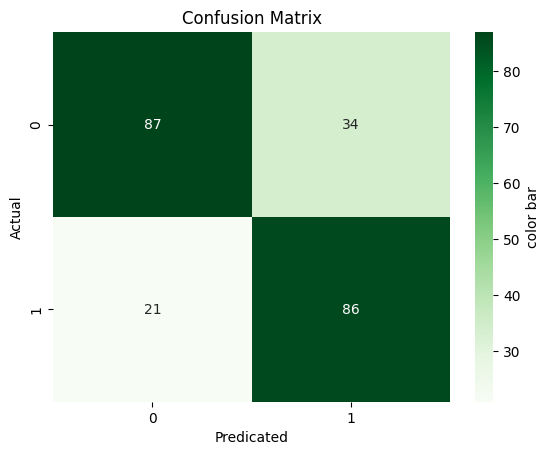

Confusion Matrix is Without Best Perimator: [[86 35]
 [19 88]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.82      0.71      0.76       121
           1       0.72      0.82      0.77       107

    accuracy                           0.76       228
   macro avg       0.77      0.77      0.76       228
weighted avg       0.77      0.76      0.76       228

The feature Selection are as follow-:
['Unnamed: 0', 'Recency']
The Hyper Parameter are as follow -:
{}
['Unnamed: 0', 'Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[97, 24],
       [39, 68]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.71      0.80      0.75       121\n           1       0.74      0.64      0.68       107\n\n    accuracy                           0.72       228\n   macro avg       0.73      0.72      0.72       228\nweighted avg       0.73      0.

In [ ]:
Listing=random_forest_classifier(X,y,1,3,parms)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


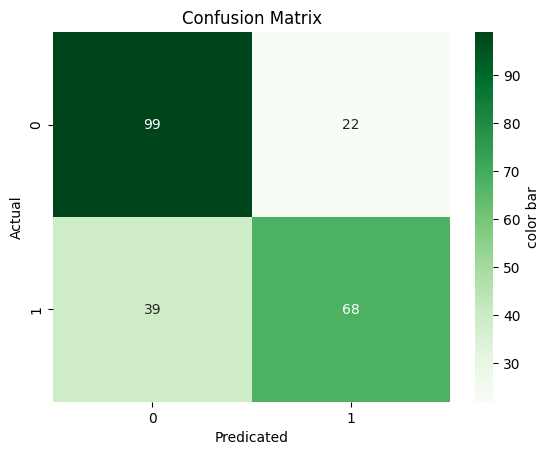

Confusion Matrix is With Best Perimator: [[99 22]
 [39 68]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.72      0.82      0.76       121
           1       0.76      0.64      0.69       107

    accuracy                           0.73       228
   macro avg       0.74      0.73      0.73       228
weighted avg       0.74      0.73      0.73       228



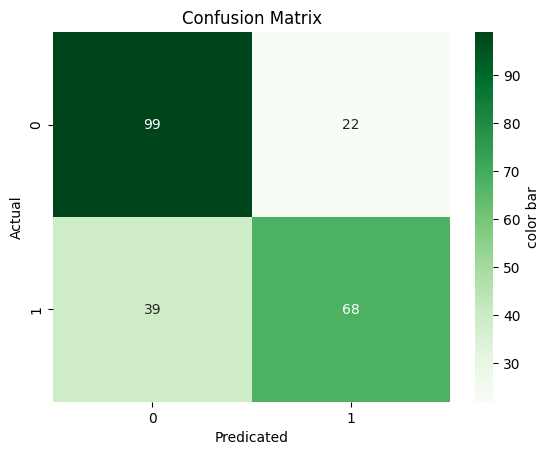

Confusion Matrix is Without Best Perimator: [[99 22]
 [39 68]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.72      0.82      0.76       121
           1       0.76      0.64      0.69       107

    accuracy                           0.73       228
   macro avg       0.74      0.73      0.73       228
weighted avg       0.74      0.73      0.73       228

The feature Selection are as follow-:
['Recency']
The Hyper Parameter are as follow -:
{}
['Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[99, 22],
       [39, 68]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.72      0.82      0.76       121\n           1       0.76      0.64      0.69       107\n\n    accuracy                           0.73       228\n   macro avg       0.74      0.73      0.73       228\nweighted avg       0.74      0.73      0.73       228\n', '

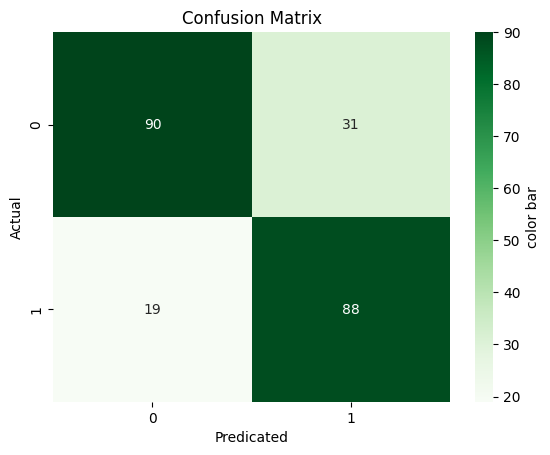

Confusion Matrix is With Best Perimator: [[90 31]
 [19 88]]
CLassification Report is With Best Perimator :               precision    recall  f1-score   support

           0       0.83      0.74      0.78       121
           1       0.74      0.82      0.78       107

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.79      0.78      0.78       228



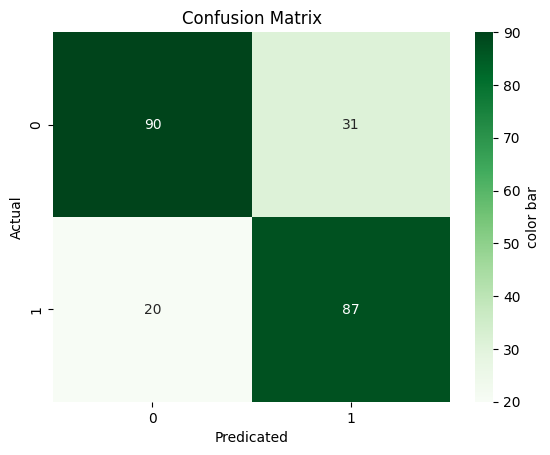

Confusion Matrix is Without Best Perimator: [[90 31]
 [19 88]]
CLassification Report is  Without Best Perimator:               precision    recall  f1-score   support

           0       0.83      0.74      0.78       121
           1       0.74      0.82      0.78       107

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.79      0.78      0.78       228

The feature Selection are as follow-:
['Unnamed: 0', 'Recency']
The Hyper Parameter are as follow -:
{}
['Unnamed: 0', 'Recency']
;isting
;isting
;isting
[{'i': 1, 'Con_mat_para': array([[99, 22],
       [39, 68]], dtype=int64), 'clas_report_para': '              precision    recall  f1-score   support\n\n           0       0.72      0.82      0.76       121\n           1       0.76      0.64      0.69       107\n\n    accuracy                           0.73       228\n   macro avg       0.74      0.73      0.73       228\nweighted avg       0.74      0.

In [ ]:
Listing = random_forest_classifier(X,y,1,3,parms)
